In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
covid = pd.read_csv("Covid_Data.csv")

In [42]:
covid.head(4)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HYPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASSIFICATION_FINAL,ICU
0,No,1,Female,Returned Home,03/05/2020,Missing Data,Yes,65,No,No,...,No,No,Yes,No,No,No,No,No,Mild,Missing Data
1,No,1,Male,Returned Home,03/06/2020,Missing Data,Yes,72,Missing Data,No,...,No,No,Yes,No,No,Yes,Yes,No,Negative,Missing Data
2,No,1,Male,Hospitalization,09/06/2020,Yes,No,55,Missing Data,Yes,...,No,No,No,No,No,No,No,No,Mild,No
3,No,1,Female,Returned Home,12/06/2020,Missing Data,No,53,No,No,...,No,No,No,No,No,No,No,No,Negative,Missing Data


In [97]:
empty_values = covid.isnull().sum()

print(empty_values)

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HYPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASSIFICATION_FINAL    0
ICU                     0
dtype: int64


In [4]:
covid.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [5]:
covid.rename(columns={'CLASIFFICATION_FINAL': 'CLASSIFICATION_FINAL'}, inplace=True)
covid.rename(columns={'HIPERTENSION': 'HYPERTENSION'}, inplace=True)

In [6]:
sex_class = {
    "1": "Female",
    "2": "Male"
}
covid["SEX"] = covid["SEX"].astype(str).replace(sex_class)

In [7]:
class_final = {
    "1": "Critical",
    "2": "Medium",
    "3": "Mild"
}
covid["CLASSIFICATION_FINAL"] = covid["CLASSIFICATION_FINAL"].astype(str).map(class_final)
covid["CLASSIFICATION_FINAL"].replace(to_replace={pd.NA: "Negative"}, inplace=True)

In [8]:
care_type = {
    "1": "Returned Home",
    "2": "Hospitalization",
    "97": "Missing Data",
    "98": "Missing Data",
    "99": "Missing Data"
}
covid["PATIENT_TYPE"] = covid["PATIENT_TYPE"].astype(str).replace(care_type)

In [9]:
monia = {
    "1": "Yes",
    "2": "No",
    "97": "Missing Data",
    "98": "Missing Data",
    "99": "Missing Data"
}
covid["PNEUMONIA"] = covid["PNEUMONIA"].astype(str).replace(monia)
covid["PREGNANT"] = covid["PREGNANT"].astype(str).replace(monia)
covid["DIABETES"] = covid["DIABETES"].astype(str).replace(monia)
covid["COPD"] = covid["COPD"].astype(str).replace(monia)
covid["ASTHMA"] = covid["ASTHMA"].astype(str).replace(monia)
covid["INMSUPR"] = covid["INMSUPR"].astype(str).replace(monia)
covid["HYPERTENSION"] = covid["HYPERTENSION"].astype(str).replace(monia)
covid["CARDIOVASCULAR"] = covid["CARDIOVASCULAR"].astype(str).replace(monia)
covid["RENAL_CHRONIC"] = covid["RENAL_CHRONIC"].astype(str).replace(monia)
covid["OTHER_DISEASE"] = covid["OTHER_DISEASE"].astype(str).replace(monia)
covid["OBESITY"] = covid["OBESITY"].astype(str).replace(monia)
covid["TOBACCO"] = covid["TOBACCO"].astype(str).replace(monia)
covid["USMER"] = covid["USMER"].astype(str).replace(monia)
covid["INTUBED"] = covid["INTUBED"].astype(str).replace(monia)
covid["ICU"] = covid["ICU"].astype(str).replace(monia)

In [10]:
covid["DATE_DIED"] = covid["DATE_DIED"].astype(str).replace("9999-99-99","9999-01-02")

In [11]:
def dod_count():
    Alive = 0
    Dead = 0

    for i in covid["DATE_DIED"]:
        if i == "9999-01-02":
            Alive += 1
        else:
            Dead += 1

    return Alive,Dead

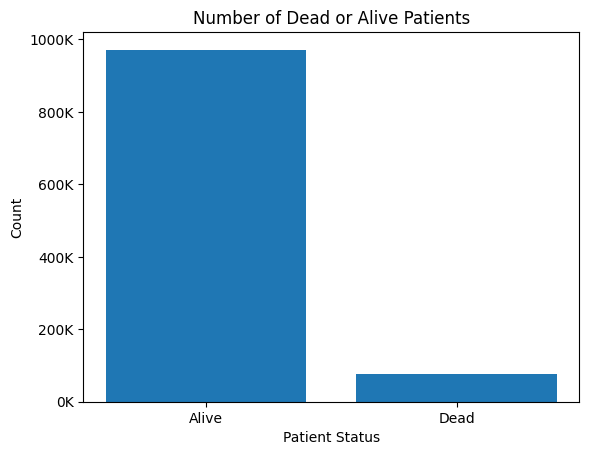

In [98]:
Alive, Dead = dod_count()

labels = ['Alive', 'Dead']
counts = [Alive, Dead]

plt.bar(labels, counts)
plt.xlabel('Patient Status')
plt.ylabel('Count')
plt.title('Number of Dead or Alive Patients')

def format_thousands(x,pos):
    return f'{x/1000:.0f}K'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_thousands))

plt.show()


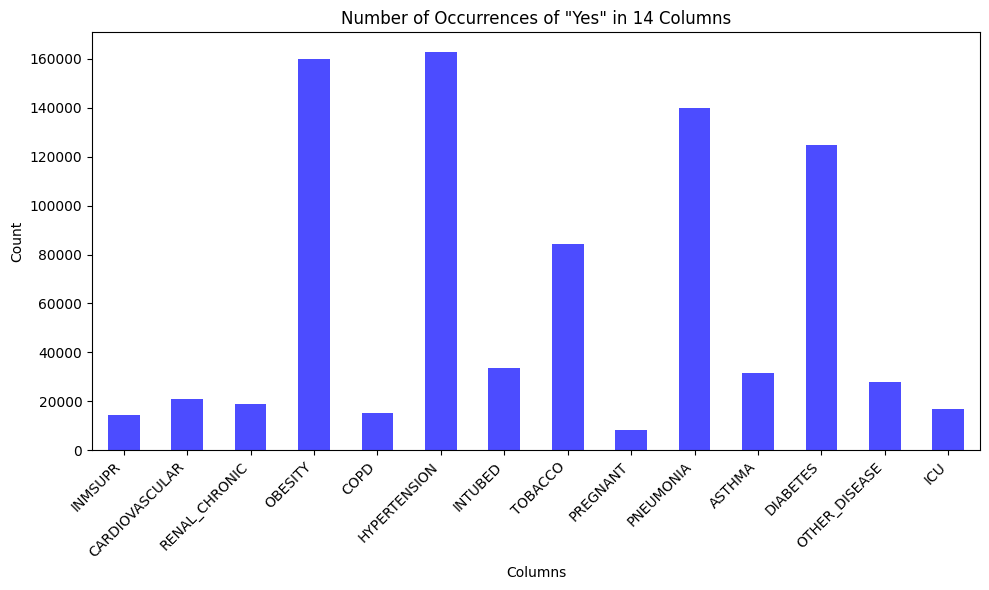

In [99]:
# Step 1: Filter the DataFrame to include rows with at least one "Yes" in the specified columns
filtered_covid = covid[(covid['INMSUPR'] == 'Yes') | 
                      (covid['CARDIOVASCULAR'] == 'Yes') | 
                      (covid['RENAL_CHRONIC'] == 'Yes') | 
                      (covid['OBESITY'] == 'Yes') | 
                      (covid['COPD'] == 'Yes') | 
                      (covid['HYPERTENSION'] == 'Yes') |
                      (covid['INTUBED'] == 'Yes') |
                      (covid['TOBACCO'] == 'Yes') |
                      (covid['PREGNANT'] == 'Yes') |
                      (covid['PNEUMONIA'] == 'Yes') |
                      (covid['ASTHMA'] == 'Yes') |
                      (covid['DIABETES'] == 'Yes') |
                      (covid['OTHER_DISEASE'] == 'Yes') |
                      (covid['ICU'] == 'Yes')]

# Step 2: Calculate the number of occurrences of "Yes" in each column
occurrences = filtered_covid[["INMSUPR", "CARDIOVASCULAR", "RENAL_CHRONIC", "OBESITY", "COPD", "HYPERTENSION", "INTUBED", "TOBACCO", "PREGNANT", "PNEUMONIA", "ASTHMA", "DIABETES", "OTHER_DISEASE", "ICU"]].apply(lambda col: (col == 'Yes').sum())

# Step 3: Plot the bar chart
plt.figure(figsize=(10, 6))
occurrences.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Number of Occurrences of "Yes" in 14 Columns')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


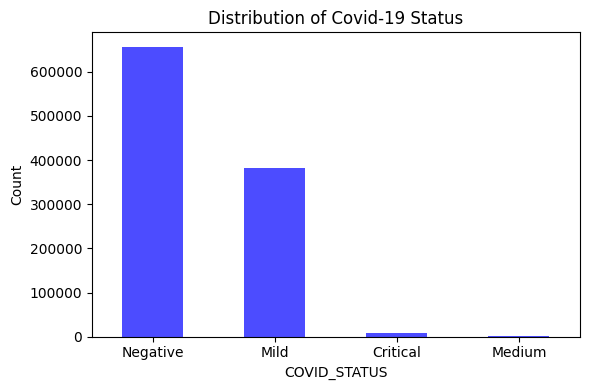

In [100]:
# Summary statistics
summary_stats = covid.describe()

# Bar plot for the target variable "High_Risk"
plt.figure(figsize=(6, 4))
covid['CLASSIFICATION_FINAL'].value_counts().plot(kind='bar', color='blue', alpha=0.7)
plt.title('Distribution of Covid-19 Status')
plt.xlabel('COVID_STATUS')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


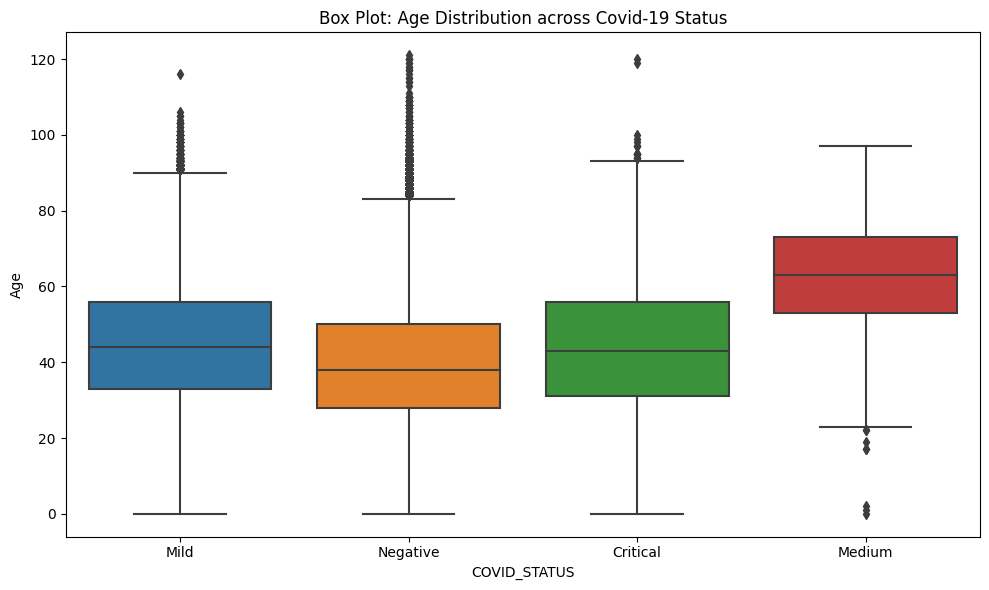

In [101]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CLASSIFICATION_FINAL', y='AGE', data=covid)
plt.title('Box Plot: Age Distribution across Covid-19 Status')
plt.xlabel('COVID_STATUS')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

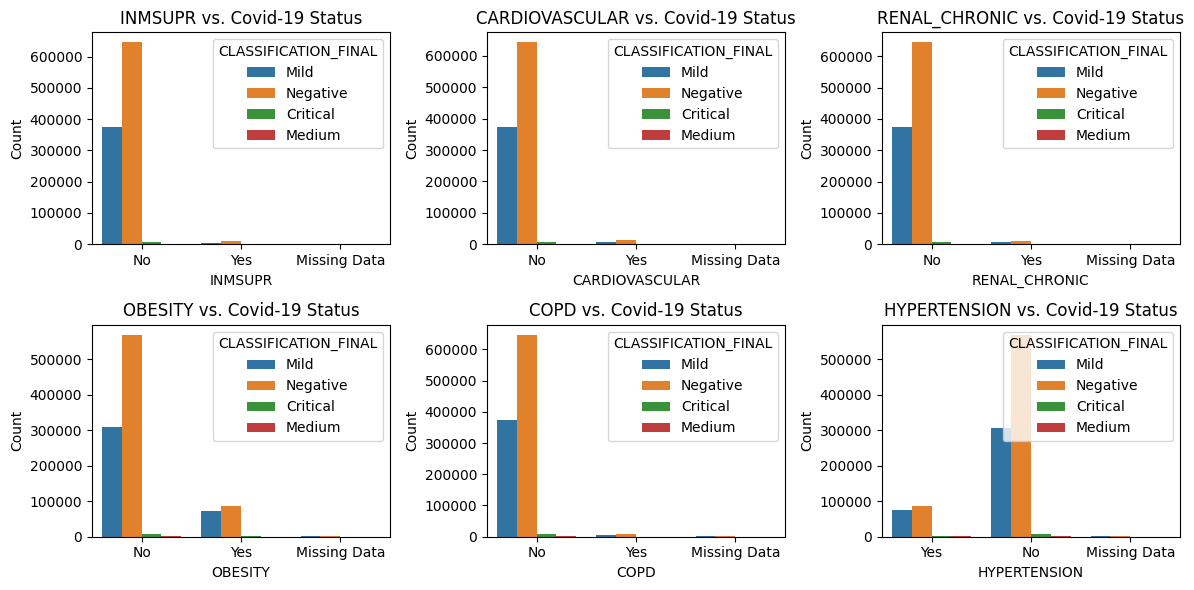

In [102]:
risk_factors = ['INMSUPR', 'CARDIOVASCULAR', 'RENAL_CHRONIC', 'OBESITY', 'COPD', 'HYPERTENSION']

plt.figure(figsize=(12, 6))
for i, factor in enumerate(risk_factors):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=factor, hue='CLASSIFICATION_FINAL', data=covid)
    plt.title(f'{factor} vs. Covid-19 Status')
    plt.xlabel(factor)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


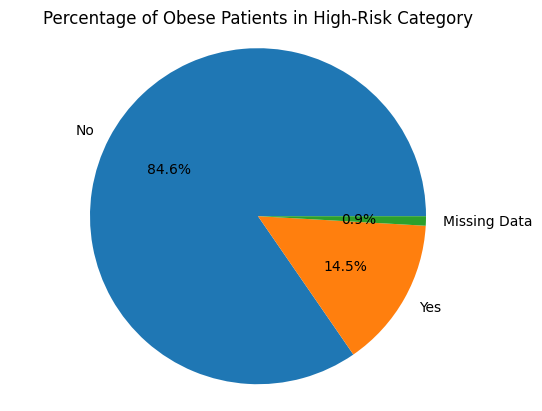

In [103]:
intubed_counts = covid[covid['CLASSIFICATION_FINAL'] == 'Critical']['OBESITY'].value_counts()
plt.pie(intubed_counts, labels=intubed_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Obese Patients in High-Risk Category')
plt.axis('equal')
plt.show()

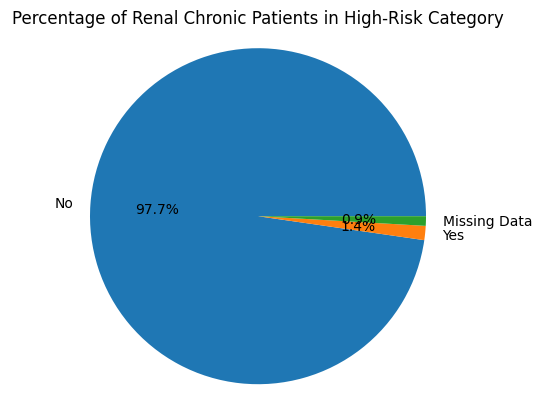

In [104]:
intubed_counts = covid[covid['CLASSIFICATION_FINAL'] == 'Critical']['RENAL_CHRONIC'].value_counts()
plt.pie(intubed_counts, labels=intubed_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Renal Chronic Patients in High-Risk Category')
plt.axis('equal')
plt.show()


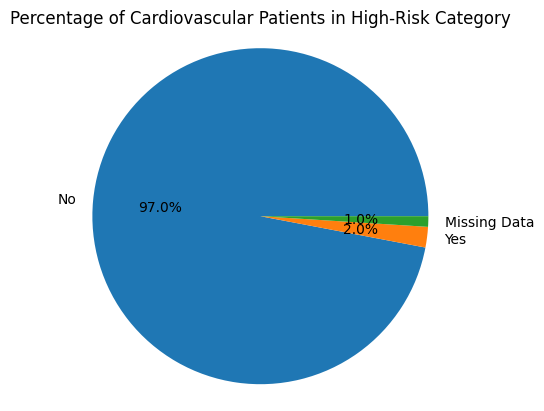

In [105]:
intubed_counts = covid[covid['CLASSIFICATION_FINAL'] == 'Critical']['CARDIOVASCULAR'].value_counts()
plt.pie(intubed_counts, labels=intubed_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Cardiovascular Patients in High-Risk Category')
plt.axis('equal')
plt.show()

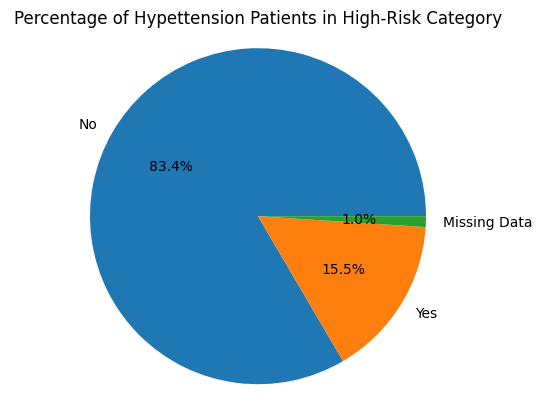

In [106]:
intubed_counts = covid[covid['CLASSIFICATION_FINAL'] == 'Critical']['HYPERTENSION'].value_counts()
plt.pie(intubed_counts, labels=intubed_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Hypettension Patients in High-Risk Category')
plt.axis('equal')
plt.show()

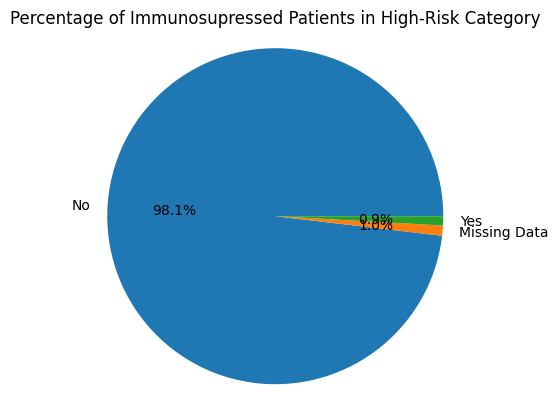

In [107]:
intubed_counts = covid[covid['CLASSIFICATION_FINAL'] == 'Critical']['INMSUPR'].value_counts()
plt.pie(intubed_counts, labels=intubed_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Immunosupressed Patients in High-Risk Category')
plt.axis('equal')
plt.show()

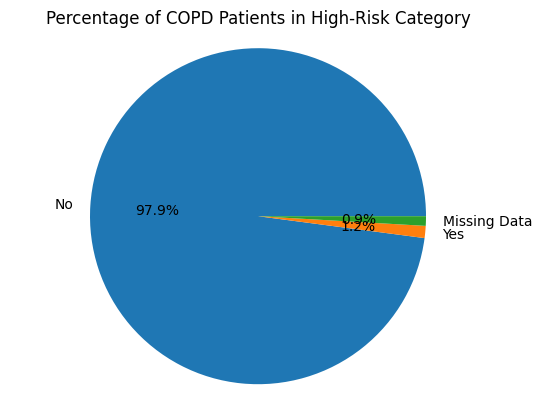

In [108]:
intubed_counts = covid[covid['CLASSIFICATION_FINAL'] == 'Critical']['COPD'].value_counts()
plt.pie(intubed_counts, labels=intubed_counts.index, autopct='%1.1f%%')
plt.title('Percentage of COPD Patients in High-Risk Category')
plt.axis('equal')
plt.show()

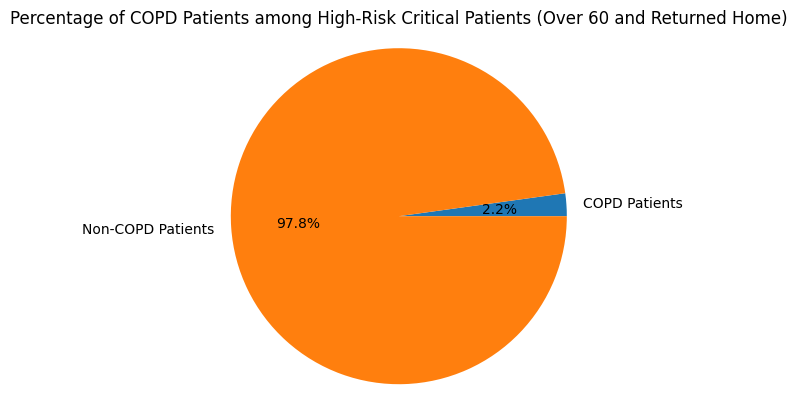

In [109]:
filtered_data = covid[(covid['AGE'] > 60) & (covid['PATIENT_TYPE'] == 'Returned Home') & (covid['CLASSIFICATION_FINAL'] == 'Critical')]

percentage_copd_patients = (filtered_data['COPD'] == 'Yes').mean() * 100

percentage_non_copd_patients = 100 - percentage_copd_patients

labels = ['COPD Patients', 'Non-COPD Patients']
sizes = [percentage_copd_patients, percentage_non_copd_patients]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of COPD Patients among High-Risk Critical Patients (Over 60 and Returned Home)')
plt.axis('equal')
plt.show()


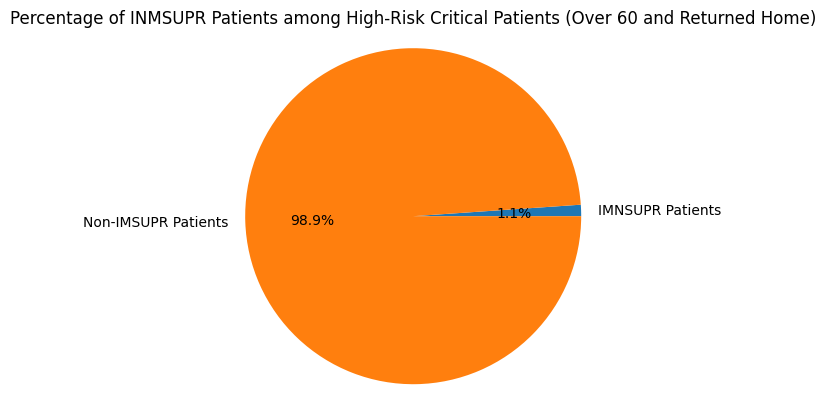

In [110]:
filtered_data = covid[(covid['AGE'] > 60) & (covid['PATIENT_TYPE'] == 'Returned Home') & (covid['CLASSIFICATION_FINAL'] == 'Critical')]

percentage_copd_patients = (filtered_data['INMSUPR'] == 'Yes').mean() * 100

percentage_non_copd_patients = 100 - percentage_copd_patients

labels = ['IMNSUPR Patients', 'Non-IMSUPR Patients']
sizes = [percentage_copd_patients, percentage_non_copd_patients]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of INMSUPR Patients among High-Risk Critical Patients (Over 60 and Returned Home)')
plt.axis('equal')
plt.show()


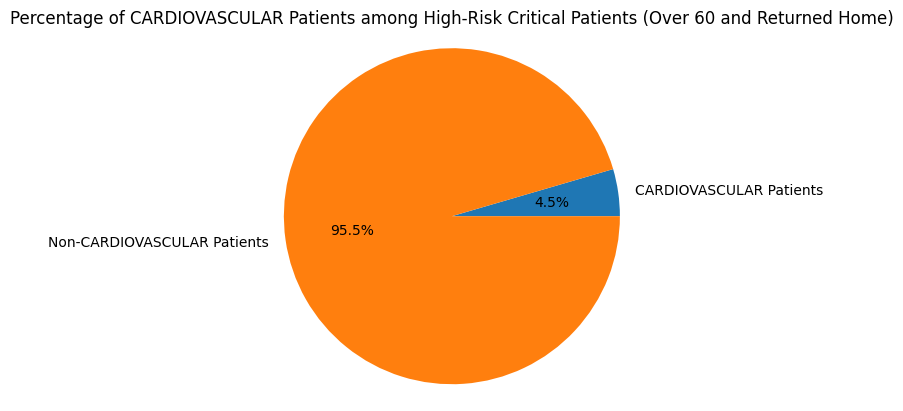

In [111]:
filtered_data = covid[(covid['AGE'] > 60) & (covid['PATIENT_TYPE'] == 'Returned Home') & (covid['CLASSIFICATION_FINAL'] == 'Critical')]

percentage_copd_patients = (filtered_data['CARDIOVASCULAR'] == 'Yes').mean() * 100

percentage_non_copd_patients = 100 - percentage_copd_patients

labels = ['CARDIOVASCULAR Patients', 'Non-CARDIOVASCULAR Patients']
sizes = [percentage_copd_patients, percentage_non_copd_patients]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of CARDIOVASCULAR Patients among High-Risk Critical Patients (Over 60 and Returned Home)')
plt.axis('equal')
plt.show()


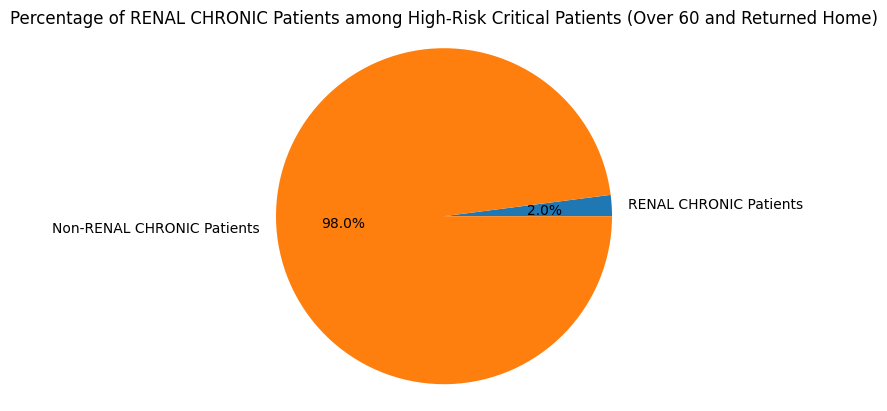

In [112]:
filtered_data = covid[(covid['AGE'] > 60) & (covid['PATIENT_TYPE'] == 'Returned Home') & (covid['CLASSIFICATION_FINAL'] == 'Critical')]

percentage_copd_patients = (filtered_data['RENAL_CHRONIC'] == 'Yes').mean() * 100

percentage_non_copd_patients = 100 - percentage_copd_patients

labels = ['RENAL CHRONIC Patients', 'Non-RENAL CHRONIC Patients']
sizes = [percentage_copd_patients, percentage_non_copd_patients]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of RENAL CHRONIC Patients among High-Risk Critical Patients (Over 60 and Returned Home)')
plt.axis('equal')
plt.show()


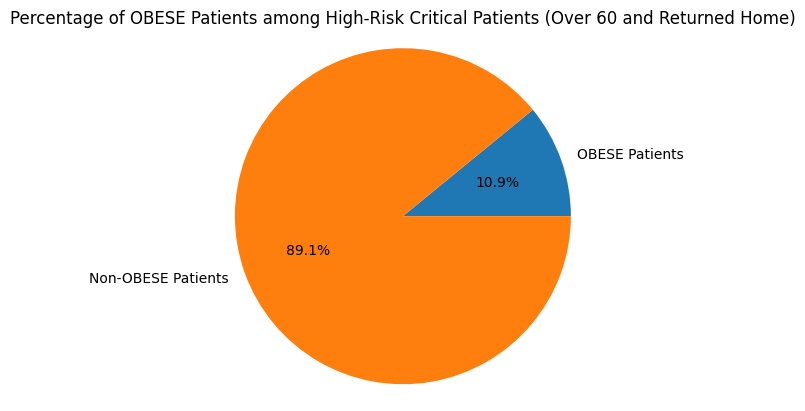

In [113]:
filtered_data = covid[(covid['AGE'] > 60) & (covid['PATIENT_TYPE'] == 'Returned Home') & (covid['CLASSIFICATION_FINAL'] == 'Critical')]

percentage_copd_patients = (filtered_data['OBESITY'] == 'Yes').mean() * 100

percentage_non_copd_patients = 100 - percentage_copd_patients

labels = ['OBESE Patients', 'Non-OBESE Patients']
sizes = [percentage_copd_patients, percentage_non_copd_patients]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of OBESE Patients among High-Risk Critical Patients (Over 60 and Returned Home)')
plt.axis('equal')
plt.show()


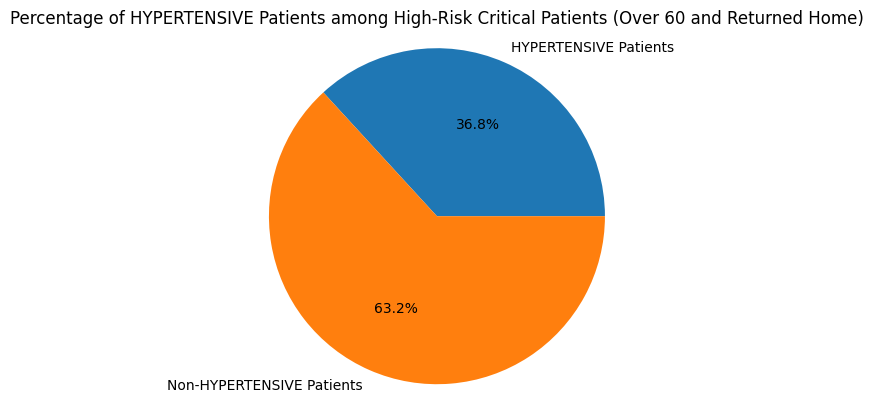

In [114]:
filtered_data = covid[(covid['AGE'] > 60) & (covid['PATIENT_TYPE'] == 'Returned Home') & (covid['CLASSIFICATION_FINAL'] == 'Critical')]

percentage_copd_patients = (filtered_data['HYPERTENSION'] == 'Yes').mean() * 100

percentage_non_copd_patients = 100 - percentage_copd_patients

labels = ['HYPERTENSIVE Patients', 'Non-HYPERTENSIVE Patients']
sizes = [percentage_copd_patients, percentage_non_copd_patients]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of HYPERTENSIVE Patients among High-Risk Critical Patients (Over 60 and Returned Home)')
plt.axis('equal')
plt.show()
